In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomTreesEmbedding, RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [2]:
train_df = pd.read_csv(r'C:\Users\One\Git\ml-ds\flight_delays_train.csv.zip', compression = 'zip')
test_df = pd.read_csv(r'C:\Users\One\Git\ml-ds\flight_delays_test.csv.zip', compression = 'zip')

# Признаки

In [3]:
#в категории признаки
for col in ['Origin', 'Dest', 'UniqueCarrier', 'dep_delayed_15min']:
    train_df[col] = pd.factorize(train_df[col])[0].astype(np.int32)
for col in ['Month', 'DayofMonth', 'DayOfWeek']:
    train_df[col] = train_df[col].apply(lambda x: x.split('-')[1]).astype(np.int32)
for col in ['Origin', 'Dest', 'UniqueCarrier']:
    test_df[col] = pd.factorize(test_df[col])[0].astype(np.int32)
for col in ['Month', 'DayofMonth', 'DayOfWeek']:
    test_df[col] = test_df[col].apply(lambda x: x.split('-')[1]).astype(np.int32)

In [4]:
train_df['morning'] = ((train_df['DepTime']//100 >= 6) & (train_df['DepTime']//100 < 12)).astype('int')
train_df['day'] = ((train_df['DepTime']//100 >= 12) & (train_df['DepTime']//100 < 18)).astype('int')
train_df['evening'] = ((train_df['DepTime']//100 >= 18) & (train_df['DepTime']//100 < 24)).astype('int')
train_df['night'] = ((train_df['DepTime']//100 >= 0) & (train_df['DepTime']//100 < 6)).astype('int')

test_df['morning'] = ((test_df['DepTime']//100 >= 6) & (test_df['DepTime']//100 < 12)).astype('int')
test_df['day'] = ((test_df['DepTime']//100 >= 12) & (test_df['DepTime']//100 < 18)).astype('int')
test_df['evening'] = ((test_df['DepTime']//100 >= 18) & (test_df['DepTime']//100 < 24)).astype('int')
test_df['night'] = ((test_df['DepTime']//100 >= 0) & (test_df['DepTime']//100 < 6)).astype('int')

In [5]:
train_df['dist500'] = ((train_df['Distance'] >0) & (train_df['Distance'] <= 500)).astype('int')
train_df['dist1000'] = ((train_df['Distance'] >500) & (train_df['Distance'] <= 1000)).astype('int')
train_df['dist1500'] = ((train_df['Distance'] >1000) & (train_df['Distance'] <= 1500)).astype('int')
train_df['dist3000'] = ((train_df['Distance'] >1500) & (train_df['Distance'] <= 3000)).astype('int')
train_df['dist5000'] = ((train_df['Distance'] >3000) & (train_df['Distance'] <= 5000)).astype('int')

test_df['dist500'] = ((test_df['Distance'] >0) & (test_df['Distance'] <= 500)).astype('int')
test_df['dist1000'] = ((test_df['Distance'] >500) & (test_df['Distance'] <= 1000)).astype('int')
test_df['dist1500'] = ((test_df['Distance'] >1000) & (test_df['Distance'] <= 1500)).astype('int')
test_df['dist3000'] = ((test_df['Distance'] >1500) & (test_df['Distance'] <= 3000)).astype('int')
test_df['dist5000'] = ((test_df['Distance'] >3000) & (test_df['Distance'] <= 5000)).astype('int')

In [6]:
train_df['month_x'] = ((train_df['Month'].isin([12, 6, 7]))).astype('int')
test_df['month_x'] = ((test_df['Month'].isin([12, 6, 7]))).astype('int')

train_df['month_y'] = ((train_df['Month'].isin([4, 6, 7]))).astype('int')
test_df['month_y'] = ((test_df['Month'].isin([4, 6, 7]))).astype('int')


train_df['winter'] = ((train_df['Month'].isin([11, 12, 1, 2]))).astype('int')
test_df['winter'] = ((test_df['Month'].isin([11, 12, 1, 2]))).astype('int')

train_df['spring'] = ((train_df['Month'].isin([3, 4]))).astype('int')
test_df['spring'] = ((test_df['Month'].isin([3, 4]))).astype('int')

train_df['summer'] = ((train_df['Month'].isin([5, 6, 7, 8]))).astype('int')
test_df['summer'] = ((test_df['Month'].isin([5, 6, 7, 8]))).astype('int')

train_df['autumn'] = ((train_df['Month'].isin([9, 10]))).astype('int')
test_df['autumn'] = ((test_df['Month'].isin([9, 10]))).astype('int')

# Делим данные

In [7]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(train_df[['dep_delayed_15min','Distance','DepTime']], axis = 1), 
                                                    train_df['dep_delayed_15min'], 
                                                    test_size=0.3, random_state=17)
X_fin_test = test_df.drop(train_df[['Distance','DepTime']], axis = 1)

In [48]:
X_test.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest',
       'morning', 'day', 'evening', 'night', 'dist500', 'dist1000', 'dist1500',
       'dist3000', 'dist5000', 'month_x', 'month_y', 'winter', 'spring',
       'summer', 'autumn'],
      dtype='object')

In [10]:
X_fin_test.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest',
       'morning', 'day', 'evening', 'night', 'dist500', 'dist1000', 'dist1500',
       'dist3000', 'dist5000', 'month_x', 'month_y', 'winter', 'spring',
       'summer', 'autumn'],
      dtype='object')

# Алгоритмы

### RandomForestClassifier     НИЗКИЙ СКОР

In [35]:

#RandomForestClassifier

par_rfc = {'n_estimators' : 100,
           'min_samples_leaf': 3, 
           'max_depth': 3, 
           'criterion': 'entropy',
           'random_state': 17}
tr1 = RandomForestClassifier(**par_rfc, n_jobs=-1)
X_train_rfc = X_train
tr1.fit(X_train_rfc, y_train)
print(roc_auc_score(y_test, tr1.predict(X_test)))

0.5


In [36]:
tr1.feature_importances_

array([0.2262341 , 0.06606893, 0.10012539, 0.2743613 , 0.29833574,
       0.03487455])

In [37]:
X_train.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest'], dtype='object')

### RandomForestClassifier GridSearchCV   _________________ 0,5 на старте, 0,511 после ФИ

In [38]:
#RandomForestClassifier GridSearchCV
tr1_params = {'max_depth': [13], 
               'criterion': ['entropy'], 
               'n_estimators' : [90], 
               'random_state': [17],
               'min_samples_leaf': [3]}
tr1_grid = GridSearchCV(tr1, tr1_params, cv=5, n_jobs=-1)
tr1_grid.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=17, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [13], 'criterion': ['entropy'], 'n_estimators': [90], 'random_state': [17], 'min_samples_leaf': [3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [24]:
tr1_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 13,
 'min_samples_leaf': 3,
 'n_estimators': 90,
 'random_state': 17}

In [39]:
print(roc_auc_score(y_test, tr1_grid.predict(X_test)))

0.5010628889085146


### RandomForestRegressor - ОТПРАВИЛ №1

In [27]:
#RandomForestRegressor

par_rfr = {'n_estimators' : 95,
               'criterion': 'mse', 
               'max_depth': 11,
               'random_state': 5,
               'min_samples_leaf': 3}
#'n_estimators' : range(10, 100, 5), 'criterion': ['mse', 'mae'], 'max_depth': range(3, 100, 2), , 'random_state': range(2, 20)
tr2 = RandomForestRegressor(**par_rfr, n_jobs=-1)
tr2.fit(X_train, y_train)
print(roc_auc_score(y_test, tr2.predict(X_test)))
#pd.Series(tr2.predict(X_fin_test), name='dep_delayed_15min').to_csv('submit_1.csv', index_label='id', header=True)

0.6181657001210124


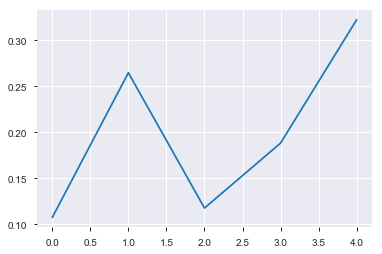

In [12]:
plt.plot(ltr2)

 ### RandomForestRegressor GridSearchCV  ДОЛГО

In [14]:
#RandomForestRegressor GridSearchCV
tr2_params = {'n_estimators' : [95],
               'criterion': ['mse'], 
               'max_depth': [11],
               'random_state': [5],
               'min_samples_leaf': [3] }
tr2_grid = GridSearchCV(tr2, tr2_params, cv=5, n_jobs=-1)
tr2_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=17, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [95], 'criterion': ['mse'], 'max_depth': [11], 'random_state': range(2, 20, 3), 'min_samples_leaf': [3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
tr2_grid.best_params_

{'criterion': 'mse',
 'max_depth': 11,
 'min_samples_leaf': 3,
 'n_estimators': 95,
 'random_state': 5}

In [16]:
print(roc_auc_score(y_test, tr2_grid.predict(X_test)))

0.699256697708925


 ### GradientBoostingRegressor   НИЗКИЙ СКОР


In [28]:
#GradientBoostingRegressor

par_gbr = {'loss': 'quantile', 
           'learning_rate': 0.5, 
           'max_depth':3, 
           'n_estimators':10, 
           'criterion': 'mse'}
gbr = GradientBoostingRegressor(**par_gbr)
gbr.fit(X_train, y_train)
roc_auc_score(y_test, gbr.predict(X_test))

0.5

In [ ]:
pd.Series(gbr.predict(X_fin_test), name='dep_delayed_15min').to_csv('submit_5.csv', index_label='id', header=True)

 ### GradientBoostingRegressor GridSearchCV - ЗАПУЩЕН

In [47]:
#GradientBoostingRegressor GridSearchCV
par2_gbr = {'criterion': ['friedman_mse'], 
           'loss': ['ls'], 
           'learning_rate': [0.85], 
           'n_estimators': [30], 
           'min_samples_leaf': [4], 
           'max_depth': [3]}
gbr2_grid = GridSearchCV(gbr, par2_gbr, cv = 5, n_jobs=-1)
gbr2_grid.fit(X_train, y_train)
%time

Wall time: 0 ns


In [48]:
gbr2_grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.85,
 'loss': 'ls',
 'max_depth': 3,
 'min_samples_leaf': 4,
 'n_estimators': 30}

In [49]:
print(roc_auc_score(y_test, gbr2_grid.predict(X_test)))

0.7026216584447269


In [50]:
pd.Series(gbr2_grid.predict(X_fin_test), name='dep_delayed_15min').to_csv('submit_11.csv', index_label='id', header=True)

 ### GradientBoostingClassifier хорошо на стандартных признаках

In [62]:
#GradientBoostingClassifier

par_gbc = {'loss': 'deviance', 
           'learning_rate': 0.1, 
           'max_depth':3, 
           'n_estimators':200, 
           'criterion': 'mse'}
gbc = GradientBoostingClassifier(**par_gbc)
gbc.fit(X_train, y_train)
roc_auc_score(y_test, gbc.predict(X_test))


0.5002236906841127

 ### GradientBoostingClassifier GridSearchCV       ПОСТАВИЛ В ОЧЕРЕДЬ

In [85]:
#GradientBoostingClassifier

par2_gbc = {'loss': ['deviance'],
            'learning_rate': [0.1], 
           'max_depth':[3], 
           'n_estimators': [10], 
           'min_samples_leaf': [3],
           'criterion': ['friedman_mse']}
gbс2_grid = GridSearchCV(gbc, par2_gbc, cv=5, n_jobs=-1)
gbс2_grid.fit(X_train, y_train)
roc_auc_score(y_test, gbс2_grid.predict(X_test))


0.5

In [78]:
gbс2_grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'n_estimators': 10}

In [ ]:
pd.Series(gbс2_grid.predict(X_fin_test), name='dep_delayed_15min').to_csv('submit_9.csv', index_label='id', header=True)

### KNeighborsClassifier  ПРЕКРАСНО СРАБАТЫВАЕТ, НО ВОЗВРАЩАЕТ ЧТО-то НЕ ТО

In [8]:
#KNeighborsClassifier
par_knc = {'n_neighbors': 3, 
           'algorithm': 'brute', 
           'p': 1, 'n_jobs': -1}
#'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2], 'n_neighbors': range(3, 10)
knc = KNeighborsClassifier(**par_knc)
knc.fit(X_train, y_train)
roc_auc_score(y_test, knc.predict(X_test))

0.5261277247511067

In [10]:
pd.Series(knc.predict_proba(X_fin_test), name='dep_delayed_15min').to_csv('submit_2.csv', index_label='id', header=True)

OSError: [WinError 1450] Недостаточно системных ресурсов для завершения операции

### KNeighborsRegressor  НЕ ПОДХОДИТ

In [26]:
#KNeighborsRegressor

par_knr = {'n_neighbors': 3, 
           'algorithm': 'brute', 
           'p': 2, 'n_jobs': -1}
#'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2], 'n_neighbors': range(3, 10)
knr = KNeighborsRegressor(**par_knr)
knr.fit(X_train, y_train)
roc_auc_score(y_test, knr.predict(X_test))

-0.28751050372990083

In [27]:
pd.Series(knr.predict(X_fin_test), name='dep_delayed_15min').to_csv('submit_3.csv', index_label='id', header=True)

In [ ]:

#try with log
full_df['Distance'] = np.log(full_df['Distance'])